In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from finrl.plot import convert_daily_return_to_pyfolio_ts

# Load daily return files
df_daily_return_1 = pd.read_csv("df_daily_return_1.csv", parse_dates=["date"])
df_daily_return_2 = pd.read_csv("df_daily_return_2.csv", parse_dates=["date"])
df_daily_return_3 = pd.read_csv("df_daily_return_3.csv", parse_dates=["date"])
df_daily_return_4 = pd.read_csv("df_daily_return_4.csv", parse_dates=["date"])
df_daily_return_5 = pd.read_csv("df_daily_return_5.csv", parse_dates=["date"])
df_daily_return_ensemble = pd.read_csv("df_daily_return_ensemble.csv", parse_dates=["date"])
df_daily_return_min = pd.read_csv("df_daily_return_min.csv", parse_dates=["date"])
df_daily_return_mvo = pd.read_csv("df_daily_return_mvo.csv", parse_dates=["date"])
df_daily_return_adaptive_mvo = pd.read_csv("df_daily_return_adaptive_mvo.csv", parse_dates=["date"])


In [16]:
from pyfolio import timeseries

return_dfs = [df_daily_return_1, df_daily_return_2, df_daily_return_3, df_daily_return_4, df_daily_return_5, df_daily_return_ensemble, df_daily_return_min, df_daily_return_mvo, df_daily_return_adaptive_mvo]
agent_names = ['A2C', 'DDPG', 'PPO', 'SAC', 'TD3', 'Ensemble', 'Min', 'Mean', 'Adaptive-Mean']

for i, df_return in enumerate(return_dfs):
    strat = convert_daily_return_to_pyfolio_ts(df_return)
    stats = timeseries.perf_stats(strat)
    print(f"\nPerformance Stats for {agent_names[i]}:\n")
    print(stats)



Performance Stats for A2C:

Annual return          0.083908
Cumulative returns     0.174857
Annual volatility      0.096094
Sharpe ratio           0.886656
Calmar ratio           0.784851
Stability              0.911259
Max drawdown          -0.106910
Omega ratio            1.158499
Sortino ratio          1.250849
Skew                  -0.516409
Kurtosis               2.184066
Tail ratio             1.059590
Daily value at risk   -0.011769
dtype: float64

Performance Stats for DDPG:

Annual return          0.154146
Cumulative returns     0.332053
Annual volatility      0.131334
Sharpe ratio           1.157526
Calmar ratio           1.243251
Stability              0.929433
Max drawdown          -0.123986
Omega ratio            1.210277
Sortino ratio          1.684344
Skew                  -0.360054
Kurtosis               1.800750
Tail ratio             1.137891
Daily value at risk   -0.015943
dtype: float64

Performance Stats for PPO:

Annual return          0.120348
Cumulative returns

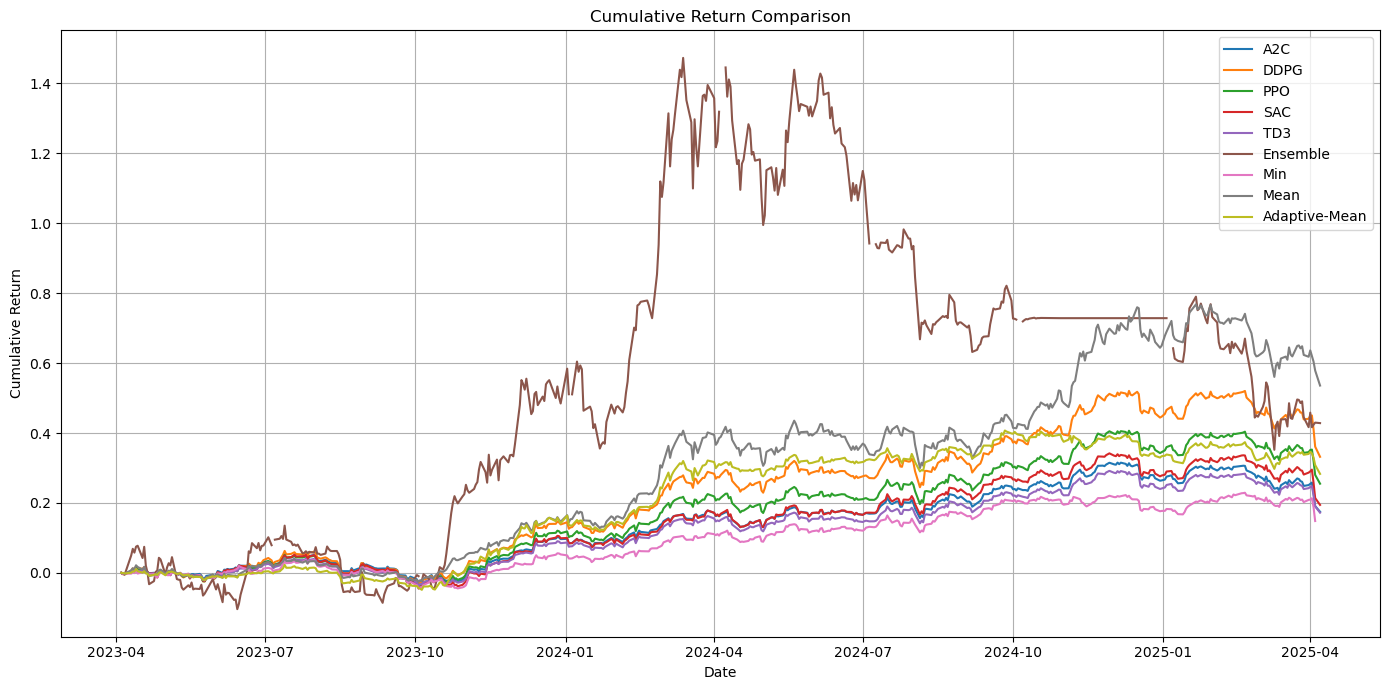

In [18]:
# Plot cumulative return
plt.figure(figsize=(14, 7))
for df, name in zip(return_dfs, agent_names):
    # Convert to pyfolio ts and calculate cumulative return
    strat = convert_daily_return_to_pyfolio_ts(df)
    cum_return = (1 + strat).cumprod() - 1
    plt.plot(cum_return.index, cum_return.values, label=name)

plt.title("Cumulative Return Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()